In [ ]:
# Dataset https://drive.google.com/file/d/19Ahv3y3mLBX87HVptrf2-r8FhsHV0QBm/view?usp=sharing

In [ ]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [ ]:
# Mount Gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Analysis & EDA

In [ ]:
#Read Dir
df = pd.read_csv('/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv')
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [ ]:
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,35063,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi
35063,35064,2017,2,28,23,15.0,22.0,13.0,34.0,500.0,60.0,7.4,1014.9,-11.9,0.0,N,1.4,Shunyi


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [ ]:
classes=list(df.year.unique())
classes

[2013, 2014, 2015, 2016, 2017]

In [ ]:
missing_values = df.isnull().sum()
missing_values_percent = 100 * df.isnull().sum() / len(df)
missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)
missing_values_table

,0,1
No,0,0.000000
year,0,0.000000
month,0,0.000000
day,0,0.000000
hour,0,0.000000
PM2.5,913,2.603810
PM10,548,1.562856
SO2,1296,3.696099
NO2,1365,3.892882
CO,2178,6.211499


In [ ]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [ ]:
df.interpolate(method='linear', inplace=True)

<ipython-input-19-a83f336b1194>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


In [ ]:
missing_values = df.isnull().sum()
missing_values_percent = 100 * df.isnull().sum() / len(df)
missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)
missing_values_table

,0,1
No,0,0.000000
year,0,0.000000
month,0,0.000000
day,0,0.000000
hour,0,0.000000
PM2.5,0,0.000000
PM10,0,0.000000
SO2,0,0.000000
NO2,0,0.000000
CO,0,0.000000


from matplotlib import pyplot as plt
missing_values_table[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
missing_values_table[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
missing_values_table.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
missing_values_table[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
missing_values_table[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
print(df[["latitude", "longitude"]].describe())


           latitude     longitude
count  3.506400e+04  3.506400e+04
mean   4.012000e+01  1.166500e+02
std    2.526015e-11  6.504401e-11
min    4.012000e+01  1.166500e+02
25%    4.012000e+01  1.166500e+02
50%    4.012000e+01  1.166500e+02
75%    4.012000e+01  1.166500e+02
max    4.012000e+01  1.166500e+02


In [ ]:
# Convert 'year', 'month', 'day', 'hour' columns into a single datetime column
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Set datetime as index for easier time-based analysis
df.set_index('datetime', inplace=True)

# Select relevant pollutant columns
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Resample data to get monthly average of pollutants
df_monthly = df[pollutants].resample('M').mean()

# Show the first few rows of processed data
df_monthly.head()

<ipython-input-22-7daa084d4977>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df[pollutants].resample('M').mean()


,PM2.5,PM10,SO2,NO2,CO,O3
datetime,,,,,,
2013-03-31,106.005533,120.077670,32.444881,59.154971,1397.540146,53.402578
2013-04-30,57.606145,83.333333,17.339322,40.030068,1029.651603,56.890489
2013-05-31,79.890688,125.257066,21.271871,42.817568,1014.553867,87.309008
2013-06-30,105.713491,113.069541,5.828783,34.339479,1378.332824,75.896877
2013-07-31,74.879612,70.185393,7.105584,30.939044,911.557971,84.059021


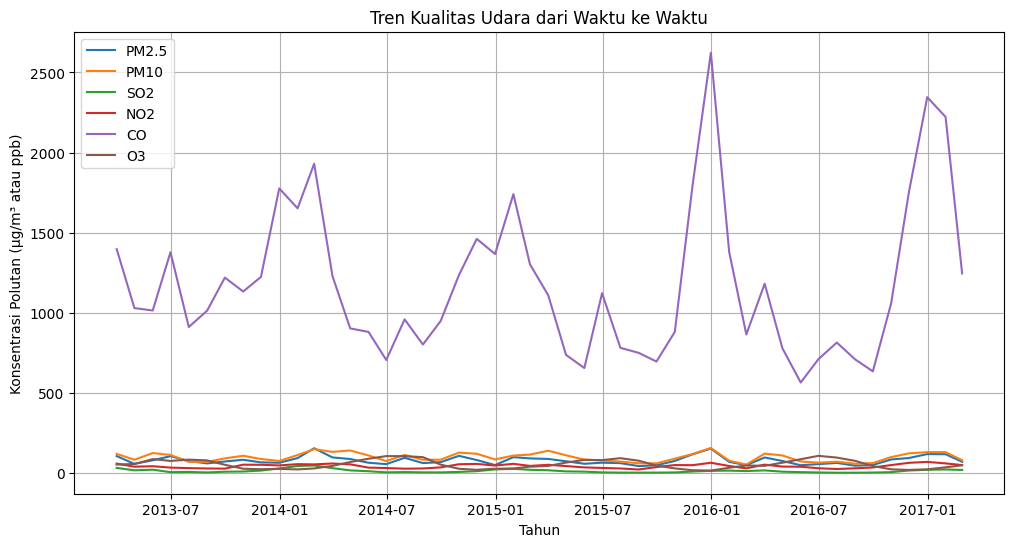

In [ ]:
import matplotlib.pyplot as plt

# Plot trends of each pollutant over time
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    plt.plot(df_monthly.index, df_monthly[pollutant], label=pollutant)

plt.title("Tren Kualitas Udara dari Waktu ke Waktu")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi Polutan (µg/m³ atau ppb)")
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-16-891c46e0a598>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
<ipython-input-16-891c46e0a598>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df.resample("M")["PM2.5"].mean(), label="PM2.5 (Rata-rata Bulanan)")
<ipython-input-16-891c46e0a598>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(df.resample("M")["PM10"].mean(), label="PM10 (Rata-rata Bulanan)", linestyle="--")


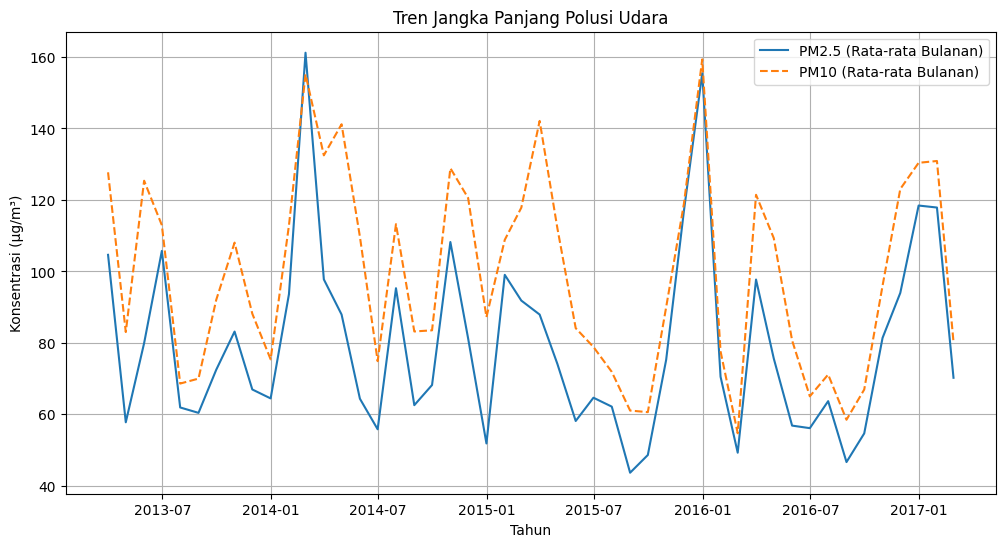

In [ ]:
# Konversi kolom waktu
df["datetime"] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Set datetime sebagai index
df.set_index("datetime", inplace=True)

# Plot Tren Polusi Udara
plt.figure(figsize=(12,6))
plt.plot(df.resample("M")["PM2.5"].mean(), label="PM2.5 (Rata-rata Bulanan)")
plt.plot(df.resample("M")["PM10"].mean(), label="PM10 (Rata-rata Bulanan)", linestyle="--")
plt.xlabel("Tahun")
plt.ylabel("Konsentrasi (µg/m³)")
plt.title("Tren Jangka Panjang Polusi Udara")
plt.legend()
plt.grid()
plt.show()

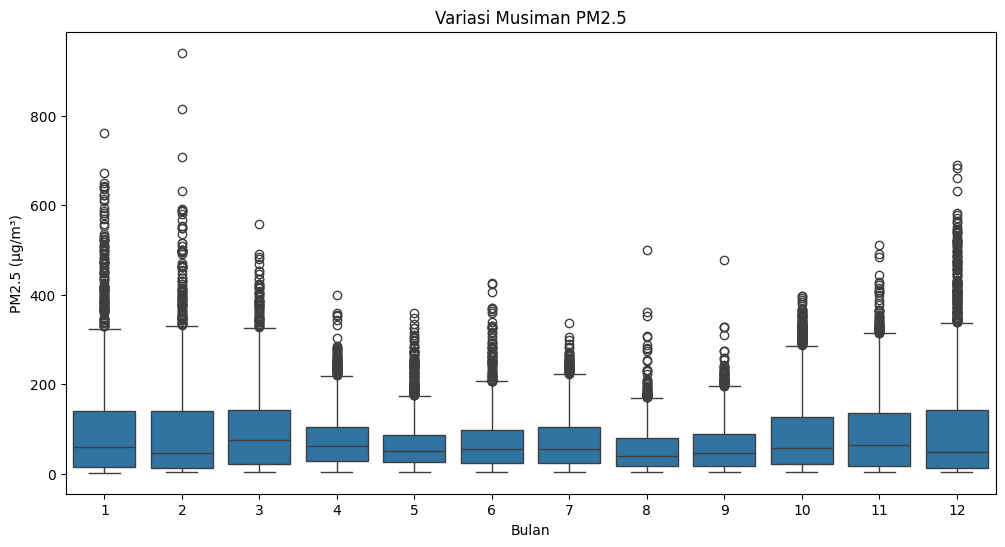

In [ ]:
# Analisis Musiman - Boxplot per bulan
plt.figure(figsize=(12,6))
sns.boxplot(x=df.index.month, y=df["PM2.5"])
plt.xlabel("Bulan")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("Variasi Musiman PM2.5")
plt.show()

**Insight**

**Struktur Dataset:**

Total Rows: 35,064\
Total Columns: 18\
Periode Data: Dari 2013-03-01 sampai 2017-02-28\
Lokasi: Shunyi (station)


**Kolom** **Penting:** \
year, month, day, hour: 	**Waktu pencatatan data**\
PM2.5, PM10, SO2, NO2, CO, O3: 	**Polutan udara**\
TEMP	**Temperatur (°C)**\
PRES	**Tekanan udara (hPa)**\
DEWP	**Titik embun (°C)**\
RAIN	**Curah hujan (mm)**\
wd	**Arah angin**\
WSPM	**Kecepatan angin (m/s)**

# Final Code


In [28]:
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [32]:
# Load data
# Kalo di Local
# df = pd.read_csv('D:\PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv')

# Kalo dari colab & gdrive
# df = pd.read_csv('/content/drive/MyDrive/Air-quality-dataset/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv')
df = pd.read_csv('/content/PRSA_Data_Shunyi_20130301-20170228.csv')

# Cek kolom
print(df.columns)

# 1. Convert kolom datetime (kalo datanya udah bener formatnya)
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']], errors='coerce')

# 2. Drop rows dengan datetime gagal parse (NA)
df.dropna(subset=['datetime'], inplace=True)

# 3. Set datetime sebagai index
df.set_index('datetime', inplace=True)

# 4. Sort index buat jaga-jaga
df.sort_index(inplace=True)

# 5. Pilih kolom polutan
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# 6. Pastikan semua kolom polutan tipe datanya numeric (incase ada string nyelip)
for pollutant in pollutants:
    df[pollutant] = pd.to_numeric(df[pollutant], errors='coerce')

# 7. Cek missing values & handle
# Cek missing values summary
print("Missing values per pollutant:\n", df[pollutants].isnull().sum())

# Handle missing values
# Kalau missingnya di tengah-tengah, fill pakai interpolasi
df[pollutants] = df[pollutants].interpolate(method='time')

# Kalau masih ada missing di awal/akhir, fill pakai metode lain
df[pollutants] = df[pollutants].fillna(method='bfill').fillna(method='ffill')

# 8. Optional: Filter outlier pake IQR biar datanya gak toxic, seperti dirinya
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_clean = remove_outliers_iqr(df, pollutants)

# 9. Buat data monthly buat tren time series
df_monthly = df_clean[pollutants].resample('M').mean()

# 10. Optional: tambahin kolom bantu buat analisis musiman
df_clean['month'] = df_clean.index.month
df_clean['year'] = df_clean.index.year

# Result
print("Data siap digunakan 🚀")
print(df_clean.head())

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')
Missing values per pollutant:
 PM2.5     913
PM10      548
SO2      1296
NO2      1365
CO       2178
O3       1489
dtype: int64
Data siap digunakan 🚀
                     No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO  \
datetime                                                                        
2013-03-01 00:00:00   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0   
2013-03-01 01:00:00   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0   
2013-03-01 02:00:00   3  2013      3    1     2   14.0  14.0  3.0  7.0  200.0   
2013-03-01 03:00:00   4  2013      3    1     3   12.0  12.0  3.0  5.0  200.0   
2013-03-01 04:00:00   5  2013      3    1     4   12.0  12.0  3.0  6.0  200.0   

                       O3  TEMP    PRES  DEWP  RAIN  wd  WSPM station  
datetime                           

<ipython-input-32-51dbf5b18c24>:40: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[pollutants] = df[pollutants].fillna(method='bfill').fillna(method='ffill')
<ipython-input-32-51dbf5b18c24>:56: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_clean[pollutants].resample('M').mean()


#Streamlit

In [33]:
# Streamlit app layout
st.title("Dashboard Kualitas Udara 🚀")

# Sidebar Navigation
st.sidebar.header("Navigasi 📌")
menu = st.sidebar.radio("Pilih visualisasi:", [
    "Tren Waktu",
    "Analisis Musiman",
    "Distribusi Polutan",
    "Korelasi Polutan",
    "Polusi per Hari (Weekday)",
    "Perbandingan Siang vs Malam",
    "Kalender Polusi",
    "Anomali Hari Polusi Tinggi",
    "AQI Calculator",
    # "statsmodel",
    "Interaktif",
])

if menu == "Tren Waktu":
    st.header("Tren Kualitas Udara dari Waktu ke Waktu 📈")
    fig, ax = plt.subplots(figsize=(12, 6))
    for pollutant in pollutants:
        ax.plot(df_monthly.index, df_monthly[pollutant], label=pollutant)
    ax.set_title("Tren Kualitas Udara dari Waktu ke Waktu")
    ax.set_xlabel("Tahun")
    ax.set_ylabel("Konsentrasi Polutan (µg/m³ atau ppb)")
    ax.legend()
    ax.grid(True)
    st.pyplot(fig)

#Analisis Musiman
elif menu == "Analisis Musiman":
    st.header("Analisis Musiman PM2.5 📊")

    # Setup figure & axis
    fig, ax = plt.subplots(figsize=(14, 7))

    # Buat boxplot yang lebih kece
    sns.boxplot(
        x=df.index.month,
        y=df["PM2.5"],
        ax=ax,
        palette="coolwarm",  # Warna kece: dari biru ke merah
        medianprops=dict(linestyle='-', linewidth=2.5, color='firebrick')
    )

    # Tambahin custom label biar ga cuma angka bulan doang
    bulan_labels = [
        "Jan", "Feb", "Mar", "Apr", "Mei", "Jun",
        "Jul", "Agu", "Sep", "Okt", "Nov", "Des"
    ]
    ax.set_xticks(range(12))
    ax.set_xticklabels(bulan_labels)

    # Set judul & label sumbu
    ax.set_xlabel("Bulan", fontsize=14)
    ax.set_ylabel("PM2.5 (µg/m³)", fontsize=14)
    ax.set_title("Variasi Musiman PM2.5 (µg/m³)\nBagaimana Polusi Udara Berubah Sepanjang Tahun", fontsize=16)

    # Batas Y (opsional, buat nge-cut outlier tinggi yang ganggu)
    ax.set_ylim(0, 500)

    # Kasih grid biar pembaca ga sipit mata
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Tampilkan di Streamlit
    st.pyplot(fig)


elif menu == "Distribusi Polutan":
    st.header("Distribusi Polutan 📊")

    pollutant = st.selectbox("Pilih polutan", pollutants)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(df[pollutant].dropna(), kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribusi {pollutant}')
    ax.set_xlabel(f'{pollutant} (µg/m³)')
    st.pyplot(fig)

elif menu == "Korelasi Polutan":
    st.header("Korelasi Antar Polutan & Cuaca 🔗")

    corr_cols = pollutants + ['TEMP', 'PRES', 'DEWP', 'WSPM']
    corr_matrix = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
    ax.set_title('Matriks Korelasi Polutan & Cuaca')
    st.pyplot(fig)

elif menu == "Polusi per Hari (Weekday)":
    st.header("Rata-rata Polusi per Hari dalam Seminggu 📅")

    df['weekday'] = df.index.day_name()  # Nama hari

    fig, ax = plt.subplots(figsize=(12, 6))
    weekday_avg = df.groupby('weekday')[pollutants].mean().reindex(
        ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    )
    weekday_avg.plot(kind='bar', ax=ax)
    ax.set_ylabel('Rata-rata Konsentrasi (µg/m³)')
    ax.set_title('Rata-rata Polusi Berdasarkan Hari')
    st.pyplot(fig)

elif menu == "Perbandingan Siang vs Malam":
    st.header("Perbandingan Siang vs Malam 🌞🌙")

    # Kategori waktu
    def get_time_of_day(hour):
        if 5 <= hour < 12:
            return 'Pagi'
        elif 12 <= hour < 17:
            return 'Siang'
        elif 17 <= hour < 21:
            return 'Sore'
        else:
            return 'Malam'

    df['time_of_day'] = df.index.hour.map(get_time_of_day)

    pollutant = st.selectbox("Pilih polutan", pollutants)

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(x='time_of_day', y=pollutant, data=df, ax=ax, order=['Pagi', 'Siang', 'Sore', 'Malam'])
    ax.set_title(f'Konsentrasi {pollutant} Berdasarkan Waktu')
    st.pyplot(fig)

elif menu == "Kalender Polusi":
    st.header("Kalender Polusi Harian 🗓️")

    pollutant = st.selectbox("Pilih polutan", pollutants)

    df_daily = df[pollutant].resample('D').mean()
    df_daily = df_daily.to_frame(name=pollutant)

    df_daily['year'] = df_daily.index.year
    df_daily['month'] = df_daily.index.month
    df_daily['day'] = df_daily.index.day

    # Pivot table buat heatmap bulan x hari (per tahun)
    year = st.selectbox("Pilih Tahun", sorted(df_daily['year'].unique()))

    df_year = df_daily[df_daily['year'] == year].pivot_table(
        index='month', columns='day', values=pollutant
    )

    fig, ax = plt.subplots(figsize=(12, 6))
    sns.heatmap(df_year, cmap='YlOrRd', ax=ax)
    ax.set_title(f'Heatmap {pollutant} Tahun {year}')
    ax.set_xlabel('Tanggal')
    ax.set_ylabel('Bulan')
    st.pyplot(fig)

elif menu == "Anomali Hari Polusi Tinggi":
    st.header("Deteksi Hari dengan Polusi Ekstrem 🚨")

    pollutant = st.selectbox("Pilih polutan", pollutants)

    threshold = st.slider(f"Threshold {pollutant}", float(df[pollutant].min()), float(df[pollutant].max()), float(df[pollutant].quantile(0.95)))

    outliers = df[df[pollutant] >= threshold]

    st.write(f"{len(outliers)} hari ditemukan dengan {pollutant} >= {threshold}")
    st.dataframe(outliers[[pollutant]].sort_values(by=pollutant, ascending=False).head(10))

    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df[pollutant], label=pollutant)
    ax.scatter(outliers.index, outliers[pollutant], color='red', label='Anomali')
    ax.set_title(f'Anomali {pollutant}')
    ax.legend()
    st.pyplot(fig)

elif menu == "AQI Calculator":
    st.header("AQI Calculator PM2.5 🌫️")

    def calculate_pm25_aqi(concentration):
        # AQI breakpoints WHO China Standard (simplified)
        if concentration <= 35:
            return "Good (0-50)"
        elif concentration <= 75:
            return "Moderate (51-100)"
        elif concentration <= 115:
            return "Unhealthy for Sensitive (101-150)"
        elif concentration <= 150:
            return "Unhealthy (151-200)"
        elif concentration <= 250:
            return "Very Unhealthy (201-300)"
        else:
            return "Hazardous (300+)"

    df_daily = df['PM2.5'].resample('D').mean()
    df_daily_aqi = df_daily.apply(calculate_pm25_aqi)

    st.dataframe(df_daily_aqi.value_counts().rename_axis('AQI Category').reset_index(name='Jumlah Hari'))

    fig, ax = plt.subplots(figsize=(8, 5))
    df_daily_aqi.value_counts().plot(kind='bar', ax=ax, color='orange')
    ax.set_ylabel('Jumlah Hari')
    ax.set_title('Distribusi Kategori AQI PM2.5')
    st.pyplot(fig)

# Testing Site
# elif menu == "statsmodel":
#     result = seasonal_decompose(df["PM2.5"], model='additive', period=12)

#     fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))
#     result.observed.plot(ax=ax1); ax1.set_title("Observed")
#     result.trend.plot(ax=ax2); ax2.set_title("Trend")
#     result.seasonal.plot(ax=ax3); ax3.set_title("Seasonal")
#     result.resid.plot(ax=ax4); ax4.set_title("Residual")

#     st.pyplot(fig)


elif menu == "Interaktif":
    st.header("Variasi Musiman PM2.5 Interaktif 📊")

    # nama bulan
    bulan_labels = [
        "Januari", "Februari", "Maret", "April", "Mei", "Juni",
        "Juli", "Agustus", "September", "Oktober", "November", "Desember"
    ]

    # Plotly chart
    fig = px.box(
        df,
        x=df.index.month,
        y="PM2.5",
        points="all",  # Tampilkan outlier
        labels={"x": "Bulan", "PM2.5": "PM2.5 (µg/m³)"},
        color=df.index.month.astype(str),
        title="Variasi Musiman PM2.5 Interaktif"
    )

    # label sumbu X
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=list(range(1, 13)),  # 1-12 sesuai month
            ticktext=bulan_labels  # Nama bulan
        )
    )

    st.plotly_chart(fig)

2025-03-10 02:51:48.145 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 02:51:48.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 02:51:48.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 02:51:48.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 02:51:48.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 02:51:48.151 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 02:51:48.152 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-10 02:51:48.153 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar